# [Lab Session 2](otsu.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 2.1.]()** Implement Otsu thresholding as a re-usable function:

In [3]:
def otsu_thresholding(imgf):
    img8 = (imgf * 255).round().astype(np.uint8)
    
    # Histogram h erzeugen
    h = np.zeros(256, dtype = int)
    for i in range(256):
        h[i] = np.sum(img8 == i)
    
    # finding perfect threshold
    def finding_threshold(img8, histogram):
        
        # Variablen initialisieren
        all_pixels = img8.size
        min_variance = float("inf")
        T_opt = 0

        # Variabeln für Otsu Methode definieren

        # Anzahl der Intensitäten in Klassse 1 (n1) und Klasse 2 (n2)
        for T in range(0,256):  # T = threshold
            n1 = np.sum(h[:T])
            n2 = np.sum(h[T:])

            if n1 == 0 or n2 == 0:  # verhindern, dass durch 0 geteilt wird
                continue
        
            # Mitterlwert für Klasse 1 (mean1) und Klasse 2 (mean2) bestimmen
            mean1 = np.sum([i * h[i] for i in range(0,T)]) / n1
            mean2 = np.sum([i * h[i] for i in range(T, 256)]) / n2

            # Varianzen der beiden Klassen bestimmen
            var1 = np.sum([((i - mean1)**2)*h[i] for i in range(0,T)]) /n1    
            var2 = np.sum([((i - mean2)**2)*h[i] for i in range(T,256)]) /n2

            within_class_variance = n1 * var1 + n2 * var2

            if within_class_variance < min_variance:
                min_variance = within_class_variance
                T_opt = T
        return T_opt

    optimal_threshold=finding_threshold(img8,h)

    # Bild binarilisieren mit dem optimalen Threshold 
    seg = np.zeros_like(img8)

    for i in range(img8.shape[0]):
        for j in range(img8.shape[1]):
            if img8[i,j]>= optimal_threshold:
                seg[i,j]=255
            else:
                seg[i,j]=0
    return seg

**[Task 2.2.]()** Implement a re-usable function to compute the Dice coefficient:

In [4]:
def compute_dice(img1,img2):
   
    img1 = img1 // 255

    
    dice = (2*(np.sum(img1*img2))/(np.sum(img1)+np.sum(img2)))
    
    return dice

**[Task 2.3.]()** Test your implementations from above:

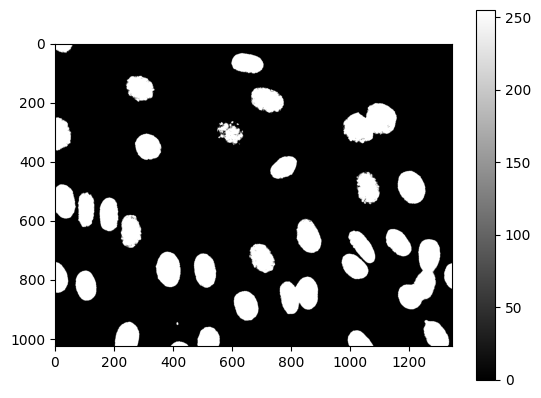

0.8943783223933183


In [5]:
imgf = plt.imread("/workspaces/Lutz-tries-to-code/data/NIH3T3/im/dna-0.png")
gt_imgf = plt.imread("/workspaces/Lutz-tries-to-code/data/NIH3T3/gt/0.png")

# Otsu Bild anzeigen lassen

otsu_img = otsu_thresholding(imgf)



plt.imshow(otsu_img, cmap="grey")
plt.colorbar()
plt.show()


# Dice Score anzeigen lassen
print(compute_dice(otsu_img,gt_imgf))



The result should be the same as in your [otsu.ipynb](otsu.ipynb) notebook.

**[Task 2.4.]()** Perform batch processing:

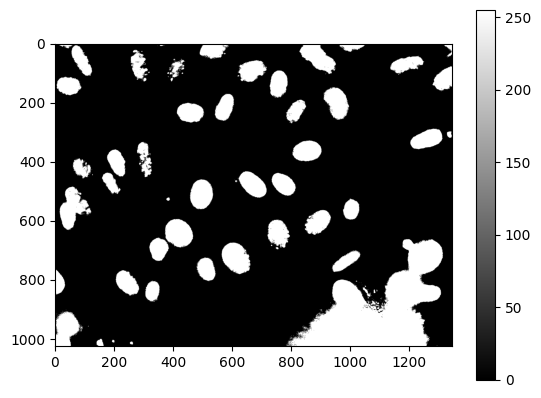

0.7528567225654604
[0.7528567225654604]


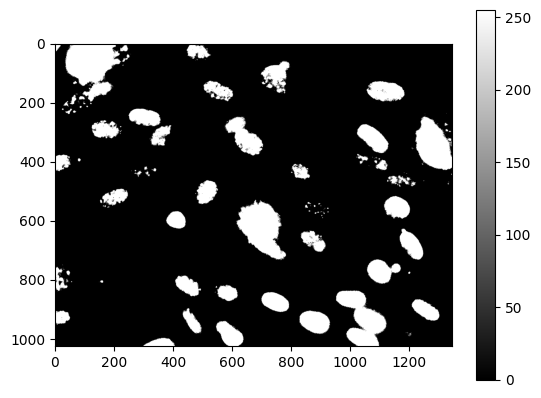

0.647632667167185
[0.7528567225654604, 0.647632667167185]


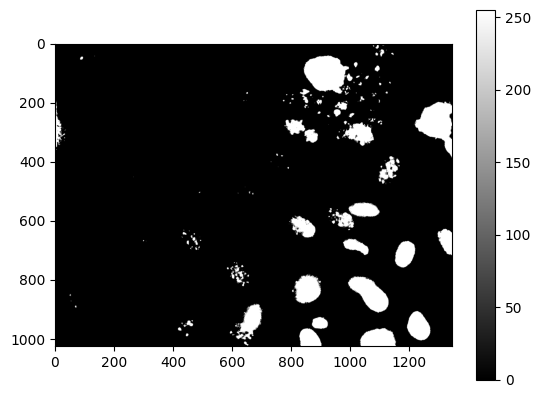

0.42998864378556173
[0.7528567225654604, 0.647632667167185, 0.42998864378556173]


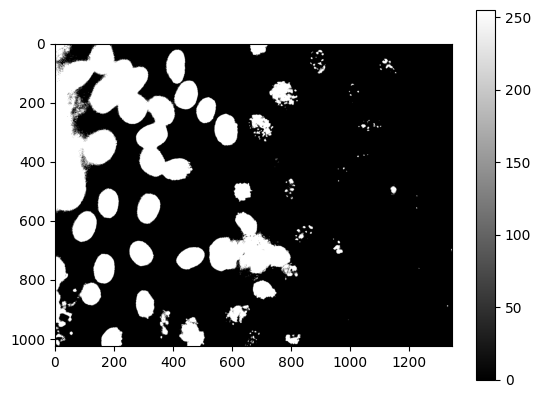

0.5789127665023891
[0.7528567225654604, 0.647632667167185, 0.42998864378556173, 0.5789127665023891]


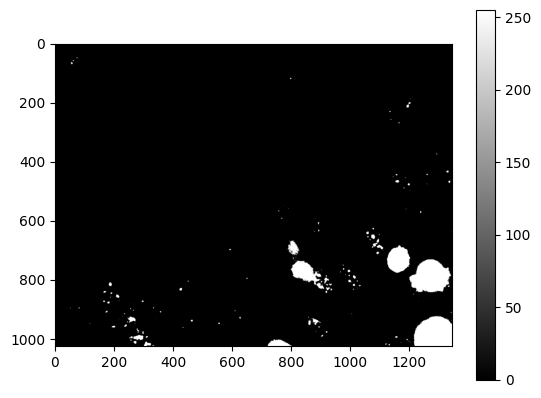

0.07605520913993832
[0.7528567225654604, 0.647632667167185, 0.42998864378556173, 0.5789127665023891, 0.07605520913993832]


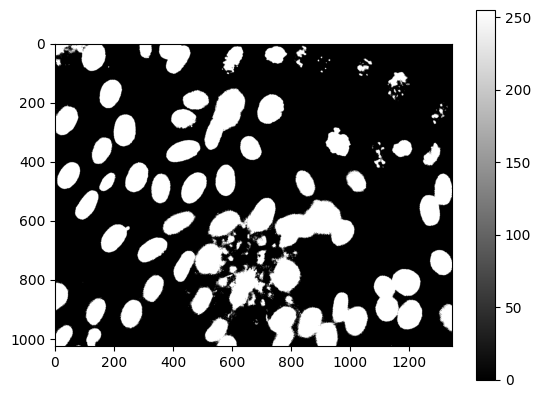

0.7965485556767932
[0.7528567225654604, 0.647632667167185, 0.42998864378556173, 0.5789127665023891, 0.07605520913993832, 0.7965485556767932]
0.5469990941395547


In [13]:
sequence = (28,29,33,44,46,49)
DiceScores = []
for i in sequence:
    img = plt.imread(f"/workspaces/Lutz-tries-to-code/data/NIH3T3/im/dna-{i}.png")
    gt_img = plt.imread(f"/workspaces/Lutz-tries-to-code/data/NIH3T3/gt/{i}.png")
    img_otsu = otsu_thresholding(img)
    plt.imshow(img_otsu, cmap="grey")
    plt.colorbar()
    plt.show()
    DSC = compute_dice(img_otsu,gt_img)
    print(DSC)
    DiceScores.append(DSC)
    print(DiceScores)

print(np.sum(DiceScores)/6)
